In [1]:
# Importing numpy, matplotlib, pandas,pandas_datareader
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\asadu\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Markowitz Portfolio Theory (MPT)
Modern portfolio theory or Markowitz Portfolio Theory (MPT) is a theory that helps construct portfolios to optimize or maximize expected return based on a given level of market risk for risk averse investors, keeping that in mind that risk is inevitable part of return. Risk and return are positively correlated. However, the theory paves the way to construct an "efficient frontier" of optimal portfolios that generate the highest possible expected return for a given level of risk. This concept was introduced by Harry Markowitz in his paper "Portfolio Selection," published in 1952 by the Journal of Finance He was later awarded a Nobel prize for developing the MPT.(Cheng, 2003)

In finance world, “FAANG” refers to the stocks of five giant American technology companies: Facebook (FB), Amazon (AMZN), Apple (AAPL), Netflix (NFLX); and Alphabet (GOOG). In addition, the five FAANG stocks are among the largest companies in the world, with a combined market capitalization of over $4.1 trillion as of January 2020.(Fernando, 2017)

We will implement Markowitz Portfolio Theory to construct  an efficient frontier of optimal portfolios.

In [45]:
# Using ticker symbols of FAANG to download and create DataFrame from 2012-05-18
assets=['FB','AMZN','AAPL','NFLX','GOOG']
pf_data =pd.DataFrame()
for t in assets:
    pf_data[t]=wb.DataReader(t, data_source="yahoo", start="2012-05-18")["Adj Close"]

In [46]:
# Showing top 6 rows of data
pf_data.head(6)

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,38.230000,213.850006,65.592659,9.994286,299.078979
2012-05-21,34.029999,218.110001,69.414101,10.248571,305.908386
2012-05-22,31.000000,215.330002,68.881065,9.672857,299.278229
2012-05-23,32.000000,217.279999,70.561768,10.272857,303.592072
2012-05-24,33.029999,215.240005,69.913734,10.038571,300.702881


In [35]:
# Locating missing values
pf_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2024 entries, 2012-05-18 to 2020-06-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      2024 non-null   float64
 1   AMZN    2024 non-null   float64
 2   AAPL    2024 non-null   float64
 3   NFLX    2024 non-null   float64
 4   GOOG    2024 non-null   float64
dtypes: float64(5)
memory usage: 94.9 KB


The normalized value for each stock after the base date/time is the percent of the base price expressed as a whole number. Here, 100 times actual price (any given date) divided by actual base price (initail date). We indiate initail date with iloc[0]. This indicator shows the percentage move in price relative to some fixed starting point ("Normalized price" 2015).

To illustrate, if we want to calculate the normalized price of Facebook("FB") for 5th day, we will devide 5th day (2012-05-18) price which is 33.029999 by base price (2012-05-24) of 38.230000 times 100.

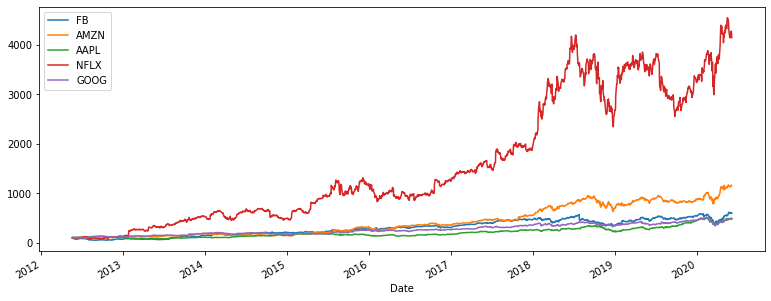

In [41]:
# Normalizing stock prices
normalized_price = pf_data/pf_data.iloc[0]*100
normalized_price.plot(figsize=(13,5))

### Simple Returns
The simple return of a portfolio is the weighted sum of the simple returns of the constituents of the portfolio. If simple returns are used than the portfolio return is the weighted average of assets in that portfolio. So one of the advantages of simple return is that it can be used where portfolios are formed and portfolio returns have to be calculated because of its asset-additive property.

$ Return = (Ending Price - Starting Price) / Starting Price$

Please note that, we will use simple returns for calculating FAANG portfolio.

### Log Returns
The log return for a time period is the sum of the log returns of partitions of the time period. For example, the log return for a year is the sum of the log returns of the days within the year. Log returns are time-additive, not asset-additive. The weighted average of log returns of individual stocks is not equal to the portfolio return. In fact, log returns are not a linear function of asset weights.

$ Return = log(Ending Price - Starting Price)$


In [ ]:
# Calculating log returns just for the record
log_returns=np.log(pf_data/pf_data.shift(1))
log_returns.tail()

In [49]:
# Calculating simple returns of FAANG portfolio
simple_returns = (pf_data / pf_data.shift(1)) - 1
simple_returns.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN
2012-05-21,-0.109861,0.019920,0.058260,0.025443,0.022835
2012-05-22,-0.089039,-0.012746,-0.007679,-0.056175,-0.021674
2012-05-23,0.032258,0.009056,0.024400,0.062029,0.014414
2012-05-24,0.032187,-0.009389,-0.009184,-0.022806,-0.009517


In [50]:
# Calculating annual simple return from daily simple returns of FAANG portfolio
annual_return = simple_returns.mean()*250
annual_return

FB      0.287960
AMZN    0.346406
AAPL    0.235010
NFLX    0.572563
GOOG    0.223035
dtype: float64

In [51]:
# Calculating annual covariance from daily simple returns of FAANG portfolio
simple_returns.cov()*250

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.137889,0.047544,0.037661,0.047843,0.044646
AMZN,0.047544,0.089154,0.034664,0.060321,0.044595
AAPL,0.037661,0.034664,0.076130,0.031918,0.036023
NFLX,0.047843,0.060321,0.031918,0.229849,0.047044
GOOG,0.044646,0.044595,0.036023,0.047044,0.062784


In [52]:
# Calculating correlation among stocks in FAANG portfolio
simple_returns.corr()

,FB,AMZN,AAPL,NFLX,GOOG
FB,1.000000,0.428809,0.367583,0.268738,0.479831
AMZN,0.428809,1.000000,0.420760,0.421380,0.596056
AAPL,0.367583,0.420760,1.000000,0.241287,0.521049
NFLX,0.268738,0.421380,0.241287,1.000000,0.391615
GOOG,0.479831,0.596056,0.521049,0.391615,1.000000


In [53]:
num_assets = len(assets)
num_assets

5

In [62]:
# Generationg random weights as per number of assets in FAANG Portfolio
weights = np.random.random(num_assets)
weights= weights / np.sum(weights)
# or weights /= np.sum(weights)
weights

array([0.31425446, 0.08397706, 0.01145954, 0.31157036, 0.27873858])

In [63]:
# Adding random weights to check if equal to 1
weights[0]+weights[1]+weights[2]+weights[3]+weights[4]

0.9999999999999998

### Expected Portfolio Return
Expected portfolio return is the weighted average of the expected return of each of its stocks. The basic expected return formula involves multiplying each asset's weight in the portfolio by its expected return, then adding all those figures together.

$ Expected  Portfolio  Return = \sum_{i=1}^{n}w_i*r_i $

In [70]:
# Calcualting annual expected returns
annual_pfolio_retrun = np.sum(weights*simple_returns.mean())*250
annual_pfolio_retrun

0.362838060634737

### Expected Portfolio Variance
Portfolio variance is a measurement of risk, of how the aggregate actual returns of a set of securities making up a portfolio fluctuate over time. This portfolio variance statistic is calculated using the standard deviations of each security in the portfolio as well as the correlations of each security pair in the portfolio. Our target is to minimize expeted portfolio variance while maximizing portfolio returns.

To calculate the portfolio variance of securities in a portfolio, multiply the squared weight of each security by the corresponding variance of the security and add two multiplied by the weighted average of the securities multiplied by the covariance between the securities (Nickolas, 2015). 

$ Expected Portfolio Variance = \sum_{i=1}^{n}(w_i^2)Var(r_i) + 2\sum_{i=1}^{n}\sum_{j=1}^{n}(w_i)(w_j)Cov(r_i,r_j) $

We will use following notation for matrix calculation, $ (w.V)^2 = w^TV.w$

Something like,

$ (w.V)^2 = [w_1 \dots w_n]
\begin{bmatrix} 
\sigma_{1}^2 & \sigma_{1,2} \dots \sigma_{1,n}\\
\sigma_{2,1} & \sigma_{2}^2 \dots \sigma_{2,n}\\
\vdots&\vdots\ddots\\
\sigma_{n,1} & \sigma_{n,2} \dots \sigma_{n}^2\\
\end{bmatrix} \begin{bmatrix} w_1 \\\vdots\\ w_n\end{bmatrix} $



In [15]:
# Calculating annual portfolio variance
annual_pfolio_variance = np.dot(weights.T, np.dot(simple_returns.cov()*250,weights))
annual_pfolio_variance

0.0353751177568021

In [73]:
# Calculating annual portfolio standard deviation or volatility
annual_pfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(simple_returns.cov()*250,weights)))
annual_pfolio_volatility

0.2745141868431745

In [85]:
# creating empty arrays
pfolio_returns = []
pfolio_volatilities = []

# Creating loop for appending  portfolio returns and volatilities in arrays
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * simple_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(simple_returns.cov() * 250, weights))))
   
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

(array([0.36450329, 0.32204063, 0.34846061, 0.36716367, 0.31272909,
        0.33916101, 0.37842885, 0.36823574, 0.34110268, 0.39977616,
        0.32377471, 0.31800344, 0.28101995, 0.3550161 , 0.30349347,
        0.37676712, 0.26015961, 0.31264025, 0.34674362, 0.36979679,
        0.36062454, 0.30232682, 0.31696053, 0.2914786 , 0.3459664 ,
        0.30817299, 0.36376609, 0.30523829, 0.40499862, 0.34107907,
        0.31663428, 0.41445626, 0.2615574 , 0.34441938, 0.34121965,
        0.33495005, 0.38198793, 0.29851407, 0.29832031, 0.29540667,
        0.34578446, 0.28590873, 0.34912155, 0.30276843, 0.30107799,
        0.3723559 , 0.35865117, 0.41654652, 0.27123368, 0.32733634,
        0.34755435, 0.35789073, 0.3144331 , 0.3858658 , 0.28761745,
        0.29335734, 0.36720183, 0.37144341, 0.33595401, 0.35130685,
        0.3532504 , 0.36566749, 0.38952174, 0.32867977, 0.37381991,
        0.29067408, 0.31102682, 0.33612209, 0.30795834, 0.31134003,
        0.33886743, 0.35445628, 0.39669825, 0.33

In [18]:
# Converting portfolio returns and portfolio volatilities arrays to a DataFrame
portfolios = pd.DataFrame({'Return':pfolio_returns, 'Volatility':pfolio_volatilities})

In [19]:
portfolios.tail()

,Return,Volatility
995,0.099143,0.189090
996,0.113558,0.228678
997,0.091091,0.179001
998,0.086917,0.177972
999,0.074969,0.191062


### Efficient Frontier
The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk (Ganti, 2003).

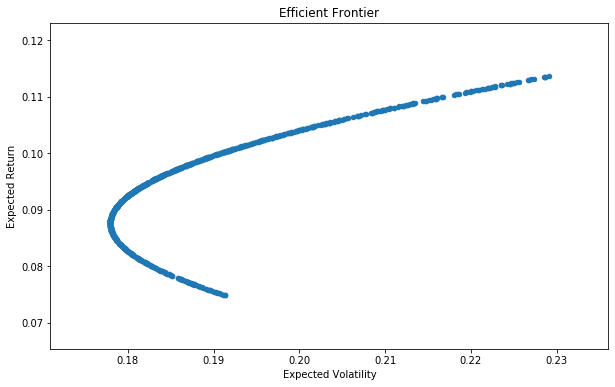

In [68]:
# Ploting Efficient Frontier of FAANG portfolio
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier of FAANG Portfolio')
plt.show()

### Sharpe Ratio
The Sharpe ratio was developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk (Hargrave, 2003).

$$ Sharpe Ratio = \frac{r_p - r_f}{ \sigma_p}$$

In [74]:
# Calculation Sharpe Ratio
# Considering risk free rate (10 Year Treasury Rate of June 4, 2020) is 0.82%. 
# For more info, refer to 'https://ycharts.com/indicators/10_year_treasury_rate'
risk_free_rate = 0.0082
sharpe_ratio = (annual_pfolio_retrun - risk_free_rate)/annual_pfolio_volatility
sharpe_ratio

1.2918751657718002

References
10 year treasury rate. (n.d.). Retrieved from https://ycharts.com/indicators/10_year_treasury_rate

Cheng, J. (2003, November 24). Modern portfolio theory (MPT). Retrieved from https://www.investopedia.com/terms/m/modernportfoliotheory.asp

Fernando, J. (2017, June 12). FAANG stock definition. Retrieved from https://www.investopedia.com/terms/f/faang-stocks.asp

Ganti, A. (2003, November 18). Efficient frontier definition. Retrieved from https://www.investopedia.com/terms/e/efficientfrontier.asp

Hargrave, M. (2003, November 26). How to use the Sharpe ratio to analyze portfolio risk and return. Retrieved from https://www.investopedia.com/terms/s/sharperatio.asp

Nickolas, S. (2015, July 15). How can I measure portfolio variance? Retrieved from https://www.investopedia.com/ask/answers/071515/how-can-i-measure-portfolio-variance.asp

Normalized price. (2015, April 22). Retrieved from https://www.linnsoft.com/techind/normalized-price